In [471]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import matplotlib.pyplot as plt

# Linear Regression

## Load in Data

In [77]:
diabetes = load_diabetes()
diabetesX = diabetes.data
diabetesY = diabetes.target

## Math notes
**L(b) = 1/2n ||Xb - y||^2**

b <- vector with beta coefficients 

X <- Matrix with n rows and d+1 columns, each row of X is augmented feature vector (1 at beginning of vector)

y <- A vector with all target values


**L'(b) = 1/n X^T (Xb - y) = 0** =

X^T Xb = X^T y    <- solve for beta and then `BAM` we're there baby

# Deriving regression as done above

In [92]:
# Each row of diabetesX is an augmented feature vector 
#   Side note though this does remove the sex column if you run a pandas .corr() you see there is almost 
#   no correlation with sex and our target value. So in case we do not mind.
diabetesX[:,0] = np.ones(diabetesX.shape[0])
# From this we then compute the coefficient matrix in the normal equations (which is now 10 x 10)
diabetesXTX = diabetesX.T @ diabetesX
# Right hand side of the normal equations
diabetesXTY = diabetesX.T @ diabetesY
# Solve the normal equations
diabetesBeta = np.linalg.solve(diabetesXTX, diabetesXTY)

## Putting it all together
We now put together all of the components into a pandas dataframe and use pandas functionality and our previously calcualted beta values to find the predicted values and can see them in comparison to the real Y values. Having it in a pandas df also would allow us to easily calcuate the MSE and other statistical calcuations around accuracy if we so desired.

In [112]:
linearRegressionTest = pd.DataFrame(diabetesX)
linearRegressionTest['realYValues'] = diabetesY
linearRegressionTest['predictedYValues'] = diabetesBeta[0] + diabetesBeta[1]*linearRegressionTest[1] + diabetesBeta[2]*linearRegressionTest[2]+ diabetesBeta[3]*linearRegressionTest[3]+ diabetesBeta[4]*linearRegressionTest[4]+ diabetesBeta[5]*linearRegressionTest[5]+ diabetesBeta[6]*linearRegressionTest[6]+ diabetesBeta[7]*linearRegressionTest[7]+ diabetesBeta[8]*linearRegressionTest[8]+ diabetesBeta[9]*linearRegressionTest[9]
linearRegressionTest

,0,1,2,3,4,5,6,7,8,9,realYValues,predictedYValues
0,1.0,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0,206.477690
1,1.0,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0,68.325985
2,1.0,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0,177.798162
3,1.0,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0,166.138490
4,1.0,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0,128.592054
...,...,...,...,...,...,...,...,...,...,...,...,...
437,1.0,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0,193.230846
438,1.0,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0,100.980006
439,1.0,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0,121.628192
440,1.0,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0,211.441064


# Logistic regression

## Math Notes

`f(x_i)` = sigmoid **(** b0 + (b_1) x_i1 + (b_2) x_i2 + ... + (b_d) x_id **)**

`Beta coefficients` -> [b1, b2, b3, ..., bn]

Choose beta coefficients to minimize `average cross entropy value` (L(b)) -> 1/n sum l(y_i f(x_i))

`Cross entropy loss function` -> l(y_i f(x_i)) 

...................................................................l_(p,q) = p log(q) - (1-p)_log(1-q)

### Gradient Descent

    1) Initial b^0 (first guess, random, all zeros)

    2) For t = 1,2,....  B^(t+1) = B^t - alpha triangle-L (b^t)
    
    
L_i'(B) = (sigmoid(X_i^hat^transpose) - y_i) X_i^hat^transpose
    

## Data Exploration and Data engineering

Here we clean and vectorize what data we can, we also remove which ever columns we believe wont be helpful after we view the correletion matrix given by titanicTrainData.corr(). From this we are left with Pclass, Sex, SibSp, and Fare. We then also shape the data to allow for matrix opperations to be allowed

In [493]:
def readInCleanAndShape(standardized):
    titanicTestData = pd.read_csv('data/titanic_test.csv')
    titanicTestData = titanicTestData[['Pclass', 'Sex', 'SibSp', 'Fare', 'Age']]
    titanicTestData = titanicTestData.dropna()
    titanicTestData['Sex'] = pd.get_dummies(titanicTestData['Sex'],drop_first=True)

    titanicTrainData = pd.read_csv('data/titanic_train.csv')
    titanicTrainData = titanicTrainData[['Survived', 'Pclass', 'Sex', 'SibSp', 'Fare', 'Age']]
    titanicTrainData['Sex'] = pd.get_dummies(titanicTrainData['Sex'],drop_first=True)
    titanicTrainData = titanicTrainData.dropna()


    #Reshape data to allow for matrix opperations in numpy
    XTitanicTrain = titanicTrainData.drop('Survived',axis=1)
    yTitanicTrain = titanicTrainData['Survived']
    
    if standardized == True: 
        
        x = titanicTestData.values #returns a numpy array
        min_max_scaler = preprocessing.MinMaxScaler()
        x_scaled = min_max_scaler.fit_transform(x)
        titanicTestData = pd.DataFrame(x_scaled)
        
        
        x = XTitanicTrain.values #returns a numpy array
        min_max_scaler = preprocessing.MinMaxScaler()
        x_scaled = min_max_scaler.fit_transform(x)
        XTitanicTrain = pd.DataFrame(x_scaled)

    XTitanicTrain = np.array(XTitanicTrain).T
    yTitanicTrain = np.array(yTitanicTrain)
    yTitanicTrain = yTitanicTrain.reshape(yTitanicTrain.shape[0], 1).T
    titanicTestData = np.array(titanicTestData).T

    return XTitanicTrain, yTitanicTrain, titanicTestData

## Model, optimize through propagation and predict

The function names say it all

Code derived from similar project in David Guy Brizan's machine learning class

In [422]:
#Simple sigmoid calculation
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [423]:
#Matrix initialization
def initialize_with_zeros(dim):
    #We initialize with zeros and the given dimension as a sort of 'random' first guess 
    #and then adjust from there through gradient descent
    return np.zeros(shape=(dim, 1)), 0

In [424]:
def propagate(weights, bias, data, labelVector):
    dataShape = data.shape[1]
    
    # Forward-propagation
    A = sigmoid(np.dot(weights.T, data) + bias)
    
    # numpy cost calculation
    cost = (-1/dataShape) * np.sum(labelVector * np.log(A) + (1-labelVector) * np.log(1-A))
        
    # back-prop
    weightGradientLoss = (1/dataShape) * np.dot(data,(A - labelVector).T)
    biasGradientLoss = (1/dataShape) * np.sum(A-labelVector)
    
    gradients = {"weightGradientLoss": weightGradientLoss, "biasGradientLoss": biasGradientLoss}
    
    return gradients, cost

In [425]:
def optimize(weightsArray, bias, data, labelVector, iterations, learning_rate):    
    costs = [] 
    
    for i in range(iterations):
        
        # Cost/gradient calculation
        gradients, cost = propagate(weightsArray, bias, data, labelVector)
        
        # Derivatives from grads
        weightGradientLoss = gradients["weightGradientLoss"]
        biasGradientLoss = gradients["biasGradientLoss"]
        
        # update bias and weights
        weightsArray = weightsArray - learning_rate * weightGradientLoss 
        bias = bias - learning_rate * biasGradientLoss
        
        # Record the cost
        costs.append(cost)
    
    weightsAndBias = {"weights": weightsArray, "bias": bias}    
    newGradients = {"weightGradientLoss": weightGradientLoss, "biasGradientLoss": biasGradientLoss}
    
    return weightsAndBias, newGradients, costs

In [429]:
def predict(weights, bias, data):
    size = data.shape[1]
    Y_prediction = np.zeros((1, size))
    weights = weights.reshape(data.shape[0], 1)
    
    # Predict the probabilities  
    A = sigmoid(np.dot(weights.T, data) + bias)
    
    # If probability > .5 then 1 else 0
    for i in range(A.shape[1]):
        if A[0, i] >= 0.5:
            Y_prediction[0, i] = 1
        else:
            Y_prediction[0, i] = 0
        
    return Y_prediction

In [483]:
def model(XTrain, YTrain, XTest, iterations, learningRate):
    weight, bias = initialize_with_zeros(XTrain.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize(weight, bias, XTrain, YTrain, iterations, learningRate)
    
    # Retrieve parameters weight and bbias from dictionary "parameters"
    weight = parameters["weights"]
    bias = parameters["bias"]
    
    # Predict test/train set examples
    YTrainPrediction = predict(weight, bias, XTrain)
    YTestPrediction = predict(weight, bias, XTest)
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(YTrainPrediction - YTrain)) * 100))
    
    predictionVSActual = {"YTrainPrediction" : YTrainPrediction[0], "YTrainActual": YTrain[0]}
    returnFrame = pd.DataFrame.from_dict(predictionVSActual)
    
    return returnFrame, YTestPrediction, costs

##  Plot of objective function vs iteration 
For both the training dataset and the validation dataset

# Plotting Different learning rates Standardized vs NonStandardized

Plotting 4 different learning rates, it would seem as though the learning rate of 0.0025 converges the fastest. Though interestingly, the training prediction accuracy drops as the learning rate rises, so though it may converge faster, the higher learning rate is the most accurate.

Also looking to whether the data is standardized or non-standardized we first see a drop in the accuracy, following that we see a stark difference in the change in convergence. For standardized we see that the lowest learning rate converges the fastest.

train accuracy: 78.71148459383754 %
train accuracy: 78.29131652661064 %
train accuracy: 78.01120448179272 %
train accuracy: 70.44817927170868 %


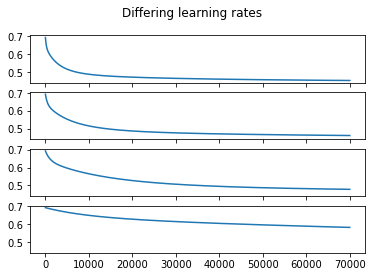

In [494]:
#Standardized
data = readInCleanAndShape(True)
learningRates = [0.005, 0.0025, 0.001, 0.0001]
fig, axs = plt.subplots(4, sharex=True, sharey=True)
fig.suptitle('Differing learning rates')
num = 0
for rate in learningRates:
    d, e, cost = model(data[0], data[1], data[2], 70000, rate)
    axs[num].plot(cost)
    num +=1

train accuracy: 80.812324929972 %
train accuracy: 78.29131652661064 %
train accuracy: 78.57142857142857 %
train accuracy: 70.16806722689076 %


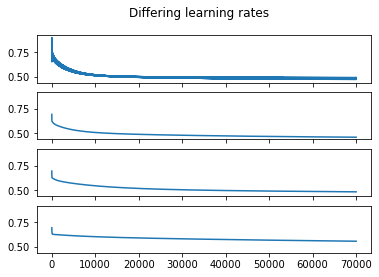

In [495]:
#Non-Standardized
data = readInCleanAndShape(False)
learningRates = [0.005, 0.0025, 0.001, 0.0001]
fig, axs = plt.subplots(4, sharex=True, sharey=True)
fig.suptitle('Differing learning rates')
num = 0
for rate in learningRates:
    d, e, cost = model(data[0], data[1], data[2], 70000, rate)
    axs[num].plot(cost)
    num +=1

# Kaggle Submission

Following some manipulation of the output data and submission to the Titanic Kaggle competition, this algorithm recieved a score of 0.72248. Though this is lower that the training accuracy, it would be by a normal standard a C. And as they say you can't spell success without a couple of C's and C's get degrees!